In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("city_day.csv")
df.head()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
df.shape
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [4]:
df = df[['Date', 'City', 'PM2.5', 'AQI']]
df.head()

,Date,City,PM2.5,AQI
0,2015-01-01,Ahmedabad,NaN,NaN
1,2015-01-02,Ahmedabad,NaN,NaN
2,2015-01-03,Ahmedabad,NaN,NaN
3,2015-01-04,Ahmedabad,NaN,NaN
4,2015-01-05,Ahmedabad,NaN,NaN


In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()


,Date,City,PM2.5,AQI
0,2015-01-01,Ahmedabad,NaN,NaN
1,2015-01-02,Ahmedabad,NaN,NaN
2,2015-01-03,Ahmedabad,NaN,NaN
3,2015-01-04,Ahmedabad,NaN,NaN
4,2015-01-05,Ahmedabad,NaN,NaN


In [6]:
df.isnull().sum()


Date        0
City        0
PM2.5    4598
AQI      4681
dtype: int64

In [7]:
df = df.dropna(subset=['PM2.5', 'AQI'])
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 24172 entries, 28 to 29530
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    24172 non-null  datetime64[ns]
 1   City    24172 non-null  object        
 2   PM2.5   24172 non-null  float64       
 3   AQI     24172 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 944.2+ KB


In [8]:
cities = ['Delhi', 'Mumbai', 'Bengaluru', 'Kolkata', 'Chennai']
df = df[df['City'].isin(cities)]
df['City'].unique()


array(['Bengaluru', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object)

In [9]:
df['Year'] = df['Date'].dt.year
df.head()


,Date,City,PM2.5,AQI,Year
4373,2015-03-21,Bengaluru,48.59,91.0,2015
4374,2015-03-22,Bengaluru,47.38,120.0,2015
4375,2015-03-23,Bengaluru,65.65,154.0,2015
4376,2015-03-24,Bengaluru,60.47,119.0,2015
4377,2015-03-25,Bengaluru,62.56,232.0,2015


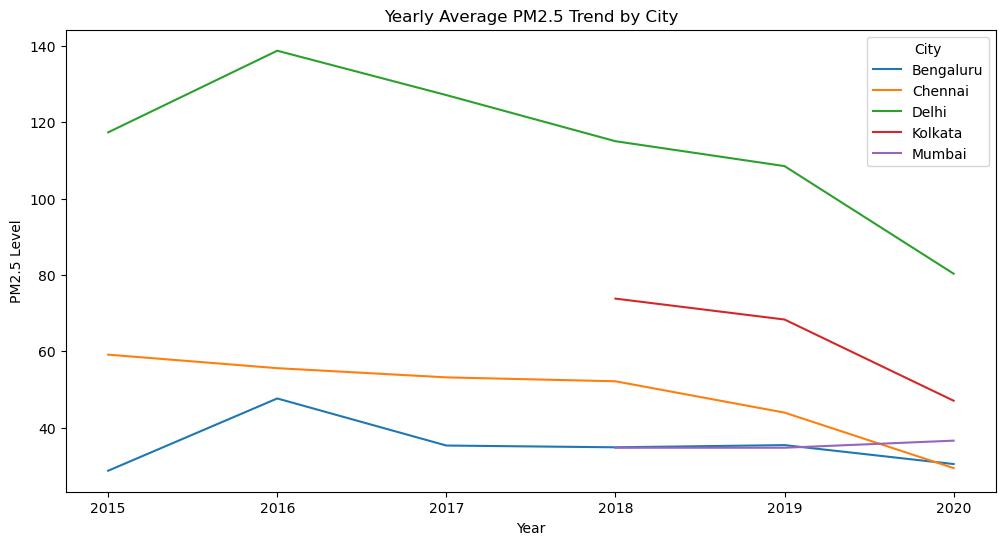

In [10]:
yearly_trend = df.groupby(['Year', 'City'])['PM2.5'].mean().unstack()
yearly_trend.plot(figsize=(12,6))
plt.title("Yearly Average PM2.5 Trend by City")
plt.ylabel("PM2.5 Level")
plt.show()


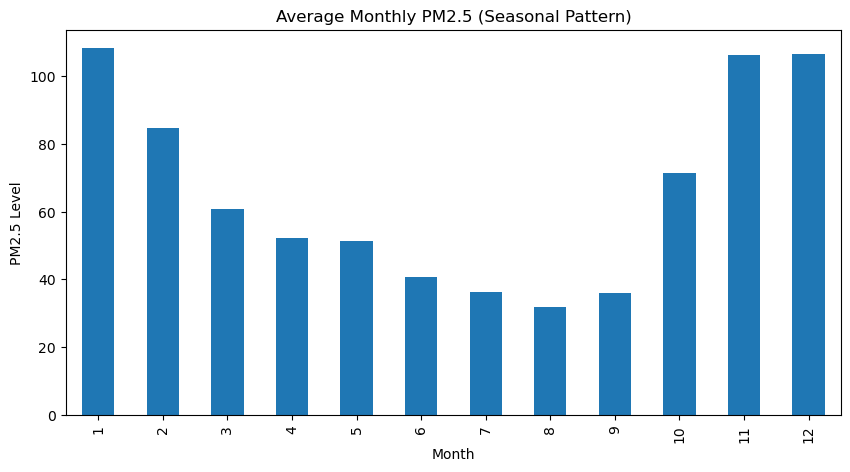

In [11]:
df['Month'] = df['Date'].dt.month
monthly_trend = df.groupby('Month')['PM2.5'].mean()

monthly_trend.plot(kind='bar', figsize=(10,5))
plt.title("Average Monthly PM2.5 (Seasonal Pattern)")
plt.ylabel("PM2.5 Level")
plt.show()


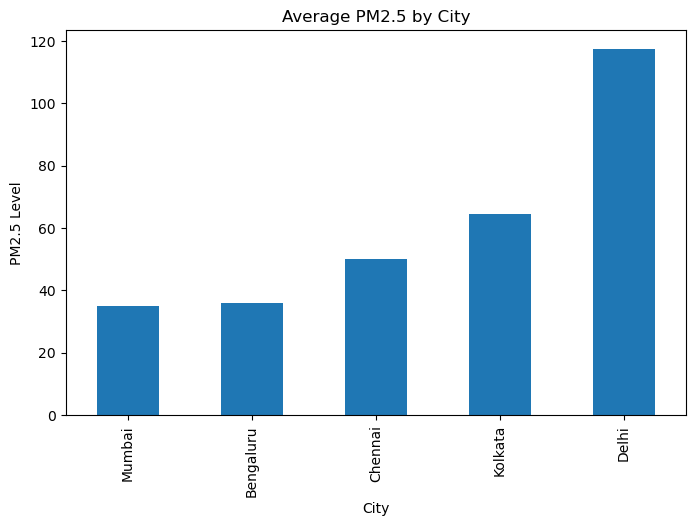

In [12]:
city_avg = df.groupby('City')['PM2.5'].mean().sort_values()

city_avg.plot(kind='bar', figsize=(8,5))
plt.title("Average PM2.5 by City")
plt.ylabel("PM2.5 Level")
plt.show()


In [13]:
df[['PM2.5', 'AQI']].corr()


,PM2.5,AQI
PM2.5,1.000000,0.894405
AQI,0.894405,1.000000


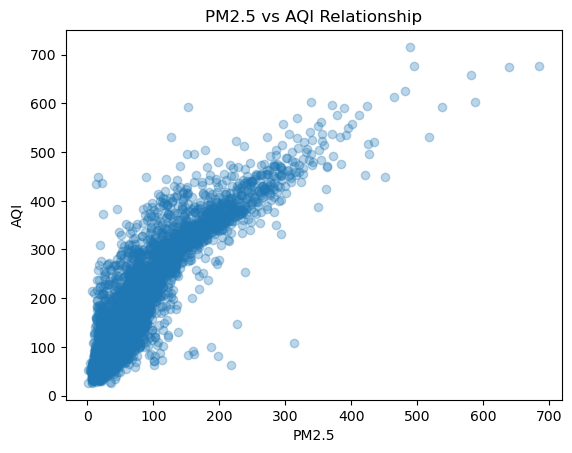

In [14]:
plt.scatter(df['PM2.5'], df['AQI'], alpha=0.3)
plt.xlabel("PM2.5")
plt.ylabel("AQI")
plt.title("PM2.5 vs AQI Relationship")
plt.show()
